<a href="https://colab.research.google.com/github/Bhuvan4402/FACE-MASK-DETECTION/blob/main/FACE_MASK_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 81% 133M/163M [00:00<00:00, 1.39GB/s]
100% 163M/163M [00:00<00:00, 1.24GB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**IMPORTING THE DEPENDENCIES**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[:8])
print(with_mask_files[-8:])

['with_mask_2201.jpg', 'with_mask_2189.jpg', 'with_mask_2838.jpg', 'with_mask_3470.jpg', 'with_mask_2913.jpg', 'with_mask_907.jpg', 'with_mask_1782.jpg', 'with_mask_82.jpg']
['with_mask_2717.jpg', 'with_mask_3034.jpg', 'with_mask_2283.jpg', 'with_mask_1953.jpg', 'with_mask_3007.jpg', 'with_mask_2117.jpg', 'with_mask_3453.jpg', 'with_mask_2469.jpg']


In [ ]:
with_mask_files

['with_mask_2201.jpg',
 'with_mask_2189.jpg',
 'with_mask_2838.jpg',
 'with_mask_3470.jpg',
 'with_mask_2913.jpg',
 'with_mask_907.jpg',
 'with_mask_1782.jpg',
 'with_mask_82.jpg',
 'with_mask_1221.jpg',
 'with_mask_1532.jpg',
 'with_mask_487.jpg',
 'with_mask_1089.jpg',
 'with_mask_2474.jpg',
 'with_mask_1163.jpg',
 'with_mask_2315.jpg',
 'with_mask_736.jpg',
 'with_mask_1171.jpg',
 'with_mask_2941.jpg',
 'with_mask_1913.jpg',
 'with_mask_1366.jpg',
 'with_mask_816.jpg',
 'with_mask_1973.jpg',
 'with_mask_1480.jpg',
 'with_mask_706.jpg',
 'with_mask_994.jpg',
 'with_mask_399.jpg',
 'with_mask_2233.jpg',
 'with_mask_1787.jpg',
 'with_mask_100.jpg',
 'with_mask_2871.jpg',
 'with_mask_3158.jpg',
 'with_mask_412.jpg',
 'with_mask_208.jpg',
 'with_mask_1464.jpg',
 'with_mask_2224.jpg',
 'with_mask_3687.jpg',
 'with_mask_2124.jpg',
 'with_mask_3265.jpg',
 'with_mask_223.jpg',
 'with_mask_3193.jpg',
 'with_mask_1471.jpg',
 'with_mask_1288.jpg',
 'with_mask_653.jpg',
 'with_mask_1420.jpg',
 '

In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[:8])
print(without_mask_files[-8:])

['without_mask_2415.jpg', 'without_mask_223.jpg', 'without_mask_1392.jpg', 'without_mask_2702.jpg', 'without_mask_2971.jpg', 'without_mask_1006.jpg', 'without_mask_3669.jpg', 'without_mask_568.jpg']
['without_mask_2749.jpg', 'without_mask_959.jpg', 'without_mask_1799.jpg', 'without_mask_1946.jpg', 'without_mask_2690.jpg', 'without_mask_1804.jpg', 'without_mask_2284.jpg', 'without_mask_39.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


CREATING LABLES FOR THE GIVEN CLASSES OF IMAGES: with_mask, without_mask


with_mask ---> 1

without_mask ---> 0


In [ ]:
# creating the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:8])

print(without_mask_labels[0:8])

[1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[:8])
print(labels[-8:])

7553
[1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0]


DISPLAYING THE IMAGES



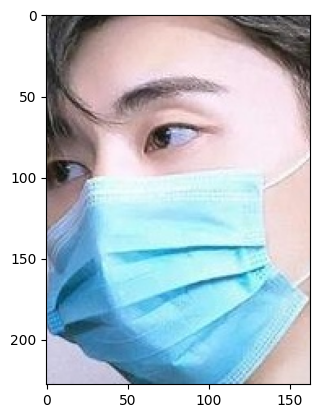

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

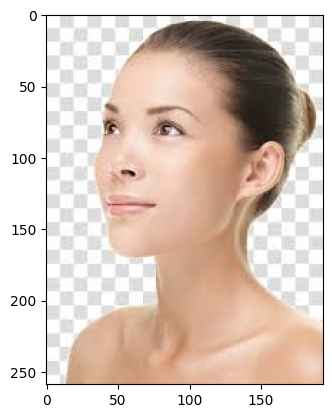

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

IMAGE PROCESSING


1. RESIZE THE IMAGES: since the images above has different resolutions, its advisible to have the sam eresolutin to all the images
2. CONVERT THE IMAGES TO NUMPY ARRAYS

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[236, 244, 247],
        [236, 244, 247],
        [236, 244, 247],
        ...,
        [245, 246, 250],
        [245, 246, 250],
        [245, 246, 251]],

       [[235, 243, 246],
        [235, 243, 246],
        [235, 243, 246],
        ...,
        [245, 246, 250],
        [245, 246, 250],
        [244, 245, 249]],

       [[233, 241, 244],
        [233, 241, 244],
        [233, 241, 244],
        ...,
        [245, 246, 250],
        [245, 246, 250],
        [241, 243, 248]],

       ...,

       [[198, 204, 216],
        [197, 200, 212],
        [196, 195, 208],
        ...,
        [233, 234, 241],
        [235, 237, 244],
        [235, 238, 248]],

       [[198, 204, 216],
        [197, 200, 212],
        [196, 195, 208],
        ...,
        [233, 233, 241],
        [234, 236, 243],
        [234, 237, 247]],

       [[202, 202, 214],
        [195, 195, 206],
        [194, 192, 204],
        ...,
        [232, 232, 238],
        [235, 234, 241],
        [235, 236, 245]]], dtype=uint8)
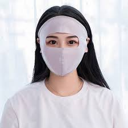

In [ ]:
data[0]

array([[[150, 108, 112],
        [159, 117, 121],
        [165, 124, 130],
        ...,
        [156,  94,  96],
        [152,  91,  96],
        [147,  86,  91]],

       [[138,  96, 100],
        [145, 105, 109],
        [150, 109, 116],
        ...,
        [145,  83,  86],
        [141,  80,  85],
        [137,  76,  81]],

       [[128,  87,  93],
        [132,  94,  99],
        [135,  95, 103],
        ...,
        [136,  74,  79],
        [129,  69,  76],
        [124,  65,  71]],

       ...,

       [[214, 227, 236],
        [214, 227, 236],
        [214, 227, 236],
        ...,
        [197, 150, 108],
        [198, 149, 108],
        [197, 148, 107]],

       [[214, 226, 238],
        [214, 226, 238],
        [214, 226, 238],
        ...,
        [198, 149, 109],
        [199, 147, 108],
        [199, 147, 108]],

       [[213, 225, 237],
        [213, 225, 237],
        [213, 225, 237],
        ...,
        [196, 147, 107],
        [197, 145, 106],
        [197, 145, 106]]], dtype=uint8)
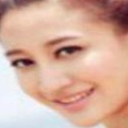

In [ ]:
data[5000]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


TRAIN TEST SPLIT


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[201, 206, 202],
        [201, 207, 203],
        [204, 207, 203],
        ...,
        [235, 234, 229],
        [233, 232, 227],
        [233, 232, 227]],

       [[198, 203, 199],
        [198, 204, 199],
        [201, 205, 200],
        ...,
        [237, 236, 231],
        [234, 234, 229],
        [234, 233, 228]],

       [[199, 202, 198],
        [199, 203, 197],
        [201, 204, 198],
        ...,
        [234, 231, 227],
        [230, 228, 223],
        [229, 226, 222]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
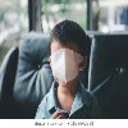

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[0.78823529, 0.80784314, 0.79215686],
        [0.78823529, 0.81176471, 0.79607843],
        [0.8       , 0.81176471, 0.79607843],
        ...,
        [0.92156863, 0.91764706, 0.89803922],
        [0.91372549, 0.90980392, 0.89019608],
        [0.91372549, 0.90980392, 0.89019608]],

       [[0.77647059, 0.79607843, 0.78039216],
        [0.77647059, 0.8       , 0.78039216],
        [0.78823529, 0.80392157, 0.78431373],
        ...,
        [0.92941176, 0.9254902 , 0.90588235],
        [0.91764706, 0.91764706, 0.89803922],
        [0.91764706, 0.91372549, 0.89411765]],

       [[0.78039216, 0.79215686, 0.77647059],
        [0.78039216, 0.79607843, 0.77254902],
        [0.78823529, 0.8       , 0.77647059],
        ...,
        [0.91764706, 0.90588235, 0.89019608],
        [0.90196078, 0.89411765, 0.8745098 ],
        [0.89803922, 0.88627451, 0.87058824]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

building the CONVOLUTIONAL NEURAL NETWORK

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=8)

Epoch 1/8
170/170 ━━━━━━━━━━━━━━━━━━━━ 128s 736ms/step - accuracy: 0.6835 - loss: 0.7645 - val_accuracy: 0.8529 - val_loss: 0.3376
Epoch 2/8
170/170 ━━━━━━━━━━━━━━━━━━━━ 129s 761ms/step - accuracy: 0.8632 - loss: 0.3540 - val_accuracy: 0.8661 - val_loss: 0.2986
Epoch 3/8
170/170 ━━━━━━━━━━━━━━━━━━━━ 133s 780ms/step - accuracy: 0.8895 - loss: 0.2829 - val_accuracy: 0.8694 - val_loss: 0.2617
Epoch 4/8
170/170 ━━━━━━━━━━━━━━━━━━━━ 134s 735ms/step - accuracy: 0.9051 - loss: 0.2364 - val_accuracy: 0.8810 - val_loss: 0.3479
Epoch 5/8
170/170 ━━━━━━━━━━━━━━━━━━━━ 122s 719ms/step - accuracy: 0.9329 - loss: 0.1966 - val_accuracy: 0.8793 - val_loss: 0.2800
Epoch 6/8
170/170 ━━━━━━━━━━━━━━━━━━━━ 123s 725ms/step - accuracy: 0.9297 - loss: 0.1867 - val_accuracy: 0.8926 - val_loss: 0.2465
Epoch 7/8
170/170 ━━━━━━━━━━━━━━━━━━━━ 124s 731ms/step - accuracy: 0.9372 - loss: 0.1581 - val_accuracy: 0.8810 - val_loss: 0.3389
Epoch 8/8
170/170 ━━━━━━━━━━━━━━━━━━━━ 124s 729ms/step - accuracy: 0.9492 - loss: 0

MODEL EVALUATION

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 301ms/step - accuracy: 0.9198 - loss: 0.1983
Test Accuracy = 0.9265387058258057


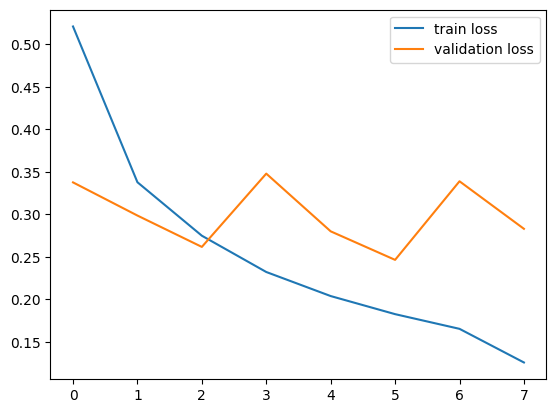

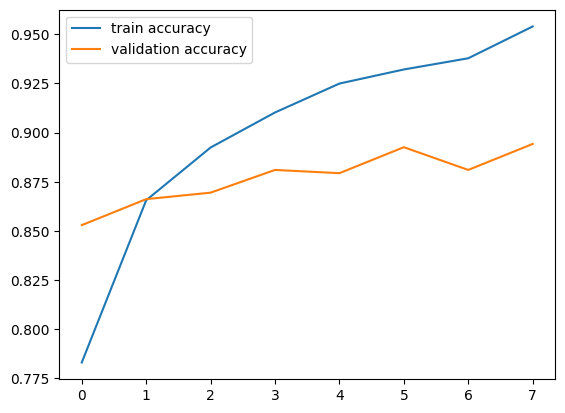

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

PREDICTIVE SYSTEM

Path of the image to be predicted: /content/data/without_mask/without_mask_1000.jpg


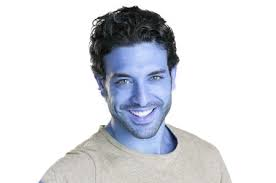

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[0.95571494 0.04428509]]
0
The person in the image is not wearing a mask


In [66]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

# Convert BGR to RGB
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

cv2_imshow(input_image)

# Resize to match model input
input_image_resized = cv2.resize(input_image, (128, 128))

# Scale pixel values
input_image_scaled = input_image_resized / 255.0

# Add batch dimension
input_image_reshaped = np.expand_dims(input_image_scaled, axis=0)

# Predict
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

# Prediction label
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
    print("The person in the image is wearing a mask")
else:
    print("The person in the image is not wearing a mask")
